In [186]:
import pandas as pd
from jdatetime import datetime, date
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import arabic_reshaper
from bidi.algorithm import get_display
import scipy.stats as st

In [240]:
df = pd.read_csv('out.csv')
df = df.drop_duplicates()
display(df)
display(df.info())

DateReserve RestaurantName RestaurantType    Meal  \
0      1402-10-10       ابوریحان      daneshgah  dinner   
1      1402-10-10       ابوریحان      daneshgah  dinner   
2      1402-10-10       ابوریحان      daneshgah  dinner   
3      1402-10-10       ابوریحان      daneshgah  dinner   
4      1402-10-10       ابوریحان      daneshgah   lunch   
...           ...            ...            ...     ...   
15963  1402-12-09        کشاورزی        khabgah  dinner   
15964  1402-12-09            کوی        khabgah  dinner   
15965  1402-12-09            کوی        khabgah  dinner   
15966  1402-12-09            کوی        khabgah   lunch   
15967  1402-12-09            کوی        khabgah   lunch   

                      FoodName FoodType Gender  ReceiveWithCard  \
0                 خوراک نودلیت   khorak    man               14   
1                 خوراک نودلیت   khorak  woman               30   
2               چلوكباب كوبیده  berenji    man              139   
3               چلوكباب كوبیده  berenji  woman               68   
4                  خوراک فلافل   khorak    man               46   
...                        ...      ...    ...              ...   
15963     خوراک سالاد ماكاروني   khorak  woman               73   
15964        خوراک كشك بادمجان   khorak    man              158   
15965  چلو خورش قیمه سیب زمینی  berenji    man              859   
15966          خوراک کوکو سبزی   khorak    man               80   
15967            زرشك پلوبامرغ  berenji    man              826   

       ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
0                    0            0           14          1   
1                    3            3           36          1   
2                    0            0          139          1   
3                   17            4           89          1   
4                    0            0           46          1   
...                ...          ...          ...        ...   
15963                7            8           88          4   
15964               10           23          191          4   
15965               47           91          997          4   
15966                7           10           97          4   
15967               58           79          963          4   

       HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   
...                   ...                     ...                     ...   
15963                   1                       0                       0   
15964                   1                       0                       0   
15965                   1                       0                       0   
15966                   1                       0                       0   
15967                   1                       0                       0   

       NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
0                 42             56                 14                 89   
1                 42             56                 14                 89   
2                 42             56                 14                 89   
3                 42             56                 14                 89   
4                 42             56                 14                 89   
...              ...            ...                ...                ...   
15963             20             21                  3                 17   
15964             20             21                  3                 17   
15965             20             21                  3                 17   
15966             20             21     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13085 entries, 0 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateReserve             13085 non-null  object
 1   RestaurantName          13085 non-null  object
 2   RestaurantType          13085 non-null  object
 3   Meal                    13085 non-null  object
 4   FoodName                13085 non-null  object
 5   FoodType                13085 non-null  object
 6   Gender                  13085 non-null  object
 7   ReceiveWithCard         13085 non-null  int64 
 8   ReceiveWithCode         13085 non-null  int64 
 9   DontReceive             13085 non-null  int64 
 10  Reservation             13085 non-null  int64 
 11  DayOfWeek               13085 non-null  int64 
 12  HolidayInWeekCount      13085 non-null  int64 
 13  HolidayInPrevWeekCount  13085 non-null  int64 
 14  HolidayInNextWeekCount  13085 non-null  int64 
 15  Ne

None

In [241]:
df = df[df['RestaurantName'].str.contains('حوزه') == False]

# Compare DayOfWeek

In [189]:
df[df['DayOfWeek'] == 6]

DateReserve RestaurantName RestaurantType    Meal  \
1931   1402-10-29       ابوریحان      daneshgah   lunch   
1932   1402-10-29       ابوریحان      daneshgah   lunch   
1933   1402-10-29      ساختمان 6        khabgah   lunch   
1934   1402-10-29      ساختمان 6        khabgah   lunch   
1935   1402-10-29  ساختمان 71و72        khabgah   lunch   
...           ...            ...            ...     ...   
15406  1402-12-25         فاطمیه        khabgah  dinner   
15407  1402-12-25          چمران        khabgah  dinner   
15408  1402-12-25          چمران        khabgah  dinner   
15409  1402-12-25            کوی        khabgah  dinner   
15410  1402-12-25            کوی        khabgah  dinner   

                     FoodName FoodType Gender  ReceiveWithCard  \
1931   عدس پلو با گوشت و كشمش  berenji    man               61   
1932   عدس پلو با گوشت و كشمش  berenji  woman               56   
1933        خوراک سالاد الویه   khorak    man              366   
1934   عدس پلو با گوشت و كشمش  berenji    man              294   
1935        خوراک سالاد الویه   khorak  woman              416   
...                       ...      ...    ...              ...   
15406            چلوجوجه كباب  berenji  woman               88   
15407       خوراک كشك بادمجان   khorak  woman                5   
15408            چلوجوجه كباب  berenji  woman               19   
15409       خوراک كشك بادمجان   khorak    man               16   
15410            چلوجوجه كباب  berenji    man              293   

       ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
1931                11            6           78          6   
1932                 7           10           73          6   
1933                22           20          408          6   
1934                18           23          335          6   
1935                39           18          473          6   
...                ...          ...          ...        ...   
15406                9           30          127          6   
15407                1            2            8          6   
15408               10           35           64          6   
15409                3            6           25          6   
15410               26           73          392          6   

       HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
1931                    0                       0                       0   
1932                    0                       0                       0   
1933                    0                       0                       0   
1934                    0                       0                       0   
1935                    0                       0                       0   
...                   ...                     ...                     ...   
15406                   0                       0                       2   
15407                   0                       0                       2   
15408                   0                       0                       2   
15409                   0                       0                       2   
15410                   0                       0                       2   

       NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
1931              23             37                 33                108   
1932              23             37                 33                108   
1933              23             37                 33                108   
1934              23             37                 33                108   
1935              23             37                 33                108   
...              ...            ...                ...                ...   
15406              4              5                 19                 33   
15407              4              5                 19                 33   
15408              4              5                 19                 33   
15409              4              5                 

In [190]:
df[df['DateReserve']=='1402-12-25']['Reservation'].sum()

1318

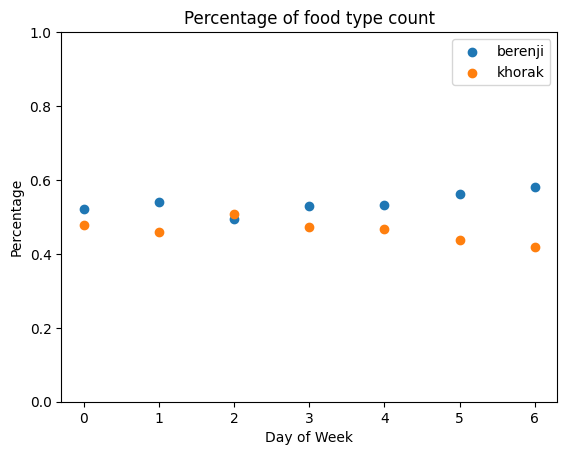

In [191]:
b = df[df['FoodType'] == 'berenji'].groupby('DayOfWeek').count()['FoodType']
k = df[df['FoodType'] == 'khorak'].groupby('DayOfWeek').count()['FoodType']
plt.scatter(b.index, b/(k+b), label='berenji')
plt.scatter(b.index, k/(k+b), label='khorak')
plt.xticks(np.arange(0,7,1))
plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Percentage of food type count')
    
plt.legend()

/tmp/ipykernel_912169/827528944.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/827528944.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



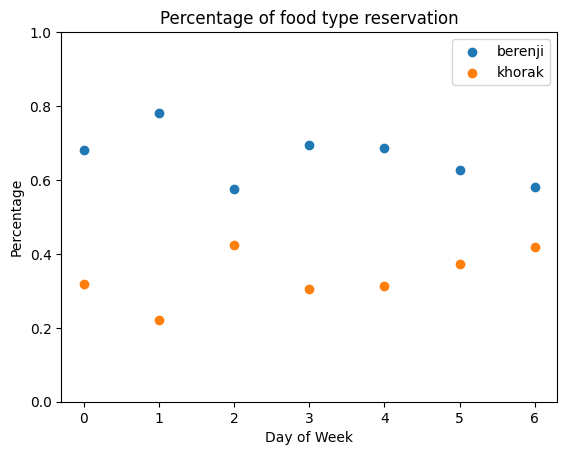

In [192]:
b = df[df['FoodType'] == 'berenji'].groupby('DayOfWeek').sum()['Reservation']
k = df[df['FoodType'] == 'khorak'].groupby('DayOfWeek').sum()['Reservation']
plt.scatter(b.index, b/(k+b), label='berenji')
plt.scatter(b.index, k/(k+b), label='khorak')
plt.xticks(np.arange(0,7,1))
plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Percentage of food type reservation')
    
plt.legend()

فاصله غذا های برنجی در سفارش بچه ها بیشتر از عرضه است

/tmp/ipykernel_912169/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/2517656469.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will de

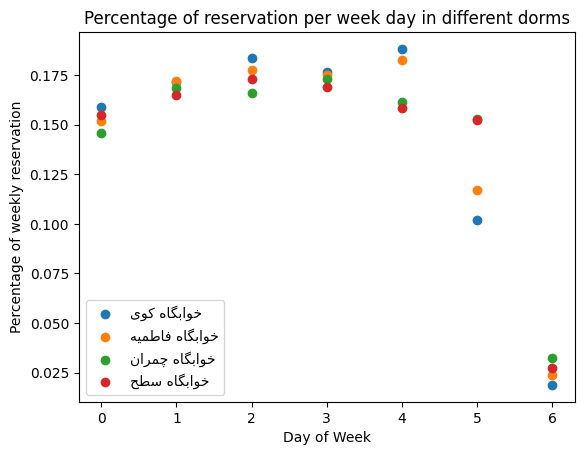

In [193]:
for i in ['کوی', 'فاطمیه', 'چمران', 'سطح']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.scatter(b.index, b['Reservation']/ b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('خوابگاه '+i)))
plt.xticks(np.arange(0,7,1))
# plt.ylim(0,1)
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different dorms')
    
plt.legend()

دانشجویان کارشناسی در دروز پنجشنبه بیشتر در خوابگاه هستند نسبت که ارشد

/tmp/ipykernel_912169/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/1368648723.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



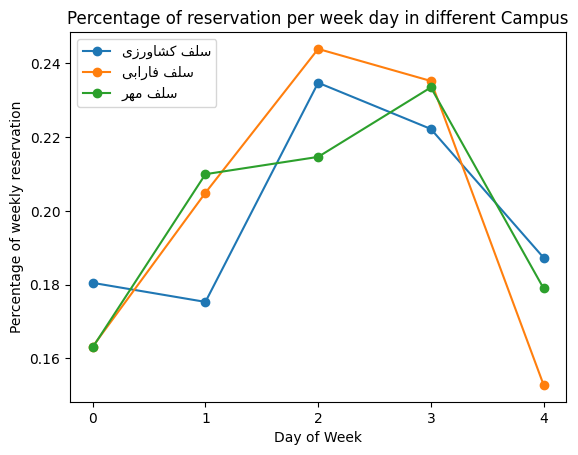

In [194]:
for i in ['کشاورزی', 'فارابی', 'مهر']:
    b = df[(df['RestaurantName'].str.contains(i)) & (df['RestaurantName'].str.contains('خوابگاه') == False)]
    b = b[b['DayOfWeek'] < 5].groupby('DayOfWeek').sum()
    plt.plot(b.index, b['Reservation'] / b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('سلف ' + i)), marker='o')
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different Campus')
    
plt.legend()

شلوغ ترین روز هفته در پردیس مرکزی و فارابی سه شنبه است و در کشاورزی دوشنبه و همچنین روز یکشنبه دانشکده کشاورزی برخلاف دو دانشکده دیگر خلوت است و روند هفتگش متفاوتی دارد

/tmp/ipykernel_912169/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/1229370835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



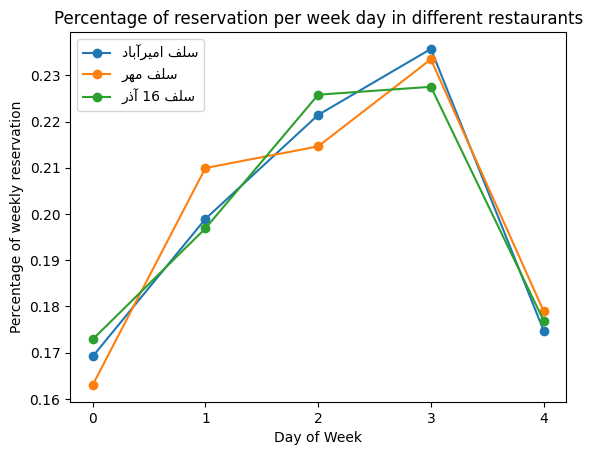

In [195]:
for i in ['امیرآباد', 'مهر', '16 آذر']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.plot(b.index, b['Reservation'] / b['Reservation'].sum(), label=get_display(arabic_reshaper.reshape('سلف ' + i)), marker='o')
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of weekly reservation')
plt.title('Percentage of reservation per week day in different restaurants')
    
plt.legend()

In [196]:
df['DontReceive'].sum()

162429

In [197]:
df['DontReceive'].sum() * 300 / 1000

48728.7

In [198]:
df['DontReceive'].sum() / df['Reservation'].sum()

0.08047218433559629

/tmp/ipykernel_912169/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_912169/3194699606.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



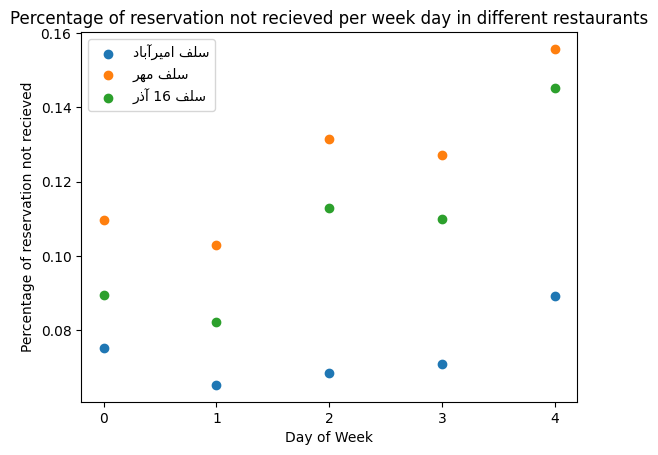

In [199]:
for i in ['امیرآباد', 'مهر', '16 آذر']:
    b = df[df['RestaurantName'].str.contains(i)].groupby('DayOfWeek').sum()
    plt.scatter(b.index, b['DontReceive']/b['Reservation'], label=get_display(arabic_reshaper.reshape('سلف '+i)))
plt.xticks(np.arange(0,5,1))
plt.xlabel('Day of Week')
plt.ylabel('Percentage of reservation not recieved')
plt.title('Percentage of reservation not recieved per week day in different restaurants')
    
plt.legend()

دانشجویان فنی بالا نسبت به ۲ سلف دیگر به میزان کمتری هدر رفت غذا دارند و تعهد بالاتری به گرفتن غذای خود دارند همچنین عدم دریافت غذا در روز چهارشنبه بیشتر میزان را دارد

# Compare DontReceiveRate and T-test

In [200]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [201]:
def plot_box(plot_var, axis='x'):
    grouped = df.groupby(['DateReserve', plot_var])
    tmp = grouped.agg({
        'ReceiveWithCard': 'sum',
        'ReceiveWithCode': 'sum',
        'DontReceive': 'sum',
        'Reservation': 'sum'
    }).reset_index()
    tmp['DontReceiveRate'] = tmp['DontReceive']/tmp['Reservation']
    fig = go.Figure()

    for i in tmp[plot_var].unique():
        if axis == 'x':
            fig.add_box(x=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))
        else:
            fig.add_box(y=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))


    if axis == 'x':    
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title="DontReceiveRate",
            yaxis_title=plot_var,
        )
    else:
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title=plot_var,
            yaxis_title="DontReceiveRate",
        )
    fig.show()
    return tmp

In [202]:
_ = plot_box('RestaurantName','y')

In [236]:
tmp = plot_box('RestaurantType')
_,p_value = st.ttest_ind(tmp[tmp['RestaurantType'] == 'khabgah']['DontReceiveRate'],
             tmp[tmp['RestaurantType'] == 'daneshgah']['DontReceiveRate'],
             alternative='less')
p_value

0.061668357792458973

$$
H_0: Rate_\text{man} - Rate_\text{woman} = 0\\
H_A: Rate_\text{man} - Rate_\text{woman} < 0
$$

In [246]:
tmp = plot_box('Gender')
_,p_value = st.ttest_ind(tmp[tmp['Gender'] == 'man']['DontReceiveRate'],
             tmp[tmp['Gender'] == 'woman']['DontReceiveRate'],
             alternative='less')
p_value

0.00019257963032806062

In [248]:
def plot_box2(plot_var, axis='x'):
    grouped = df[df['RestaurantName'].str.contains('فنی')].groupby(['DateReserve', plot_var])
    tmp = grouped.agg({
        'ReceiveWithCard': 'sum',
        'ReceiveWithCode': 'sum',
        'DontReceive': 'sum',
        'Reservation': 'sum'
    }).reset_index()
    tmp['DontReceiveRate'] = tmp['DontReceive']/tmp['Reservation']
    fig = go.Figure()

    for i in tmp[plot_var].unique():
        if axis == 'x':
            fig.add_box(x=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))
        else:
            fig.add_box(y=tmp[tmp[plot_var] == i]['DontReceiveRate'], name=str(i))


    if axis == 'x':    
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title="DontReceiveRate",
            yaxis_title=plot_var,
        )
    else:
        fig.update_layout(
            title="DontReceiveRate per "+plot_var,
            xaxis_title=plot_var,
            yaxis_title="DontReceiveRate",
        )
    fig.show()
    return tmp

In [249]:
tmp = plot_box2('Gender')
_,p_value = st.ttest_ind(tmp[tmp['Gender'] == 'man']['DontReceiveRate'],
             tmp[tmp['Gender'] == 'woman']['DontReceiveRate'],
             alternative='less')
p_value

8.122862640041408e-06

بنابراین میزان عدم دریافت در خانم ها بیشتر از آقایان است

$$
H_0: Rate_\text{x} - Rate_\text{y} = 0\\
H_A: Rate_\text{x} - Rate_\text{y} < 0\\
$$

$$
H_0: Rate_\text{week without holiday} - Rate_\text{week with holiday} = 0\\
H_A: Rate_\text{week without holiday} - Rate_\text{week with holiday} < 0\\
$$

In [204]:
for i in ['HolidayInPrevWeekCount', 'HolidayInWeekCount', 'HolidayInNextWeekCount']:
    tmp = plot_box(i)
    _,p_value = st.ttest_ind(tmp[tmp[i] == 0]['DontReceiveRate'],
                 tmp[tmp[i] > 0]['DontReceiveRate'],
                 alternative='less')
    print(i, p_value)

HolidayInPrevWeekCount 0.6598934415351067


HolidayInWeekCount 0.0015523417383000878


HolidayInNextWeekCount 0.0009247972191649749


تعداد تعطیلی های هفته همانطور که انتظار می رفت موثر است
همچنین تعطیلی های هفته بعد روی عدم دریافت موثر است ولی هفته گذشته با ضریب اطمینان بالایی تاثیر ندارد

$$
H_0: Rate_\text{dinner} - Rate_\text{lunch} = 0\\
H_A: Rate_\text{dinner} - Rate_\text{lunch} < 0\\
$$

In [205]:
tmp = plot_box('Meal')
_,p_value = st.ttest_ind(tmp[tmp['Meal'] == 'dinner']['DontReceiveRate'],
             tmp[tmp['Meal'] == 'lunch']['DontReceiveRate'],
             alternative='less')
p_value

0.14423202264261992

$$
H_0: Rate_\text{berenji} - Rate_\text{khorak} = 0\\
H_A: Rate_\text{berenji} - Rate_\text{khorak} < 0\\
$$

ناهار یا شام بودن وعده غذایی تاثیری روی میزان عدم دریافت ندارد

In [206]:
tmp = plot_box('FoodType')
_,p_value = st.ttest_ind(tmp[tmp['FoodType'] == 'berenji']['DontReceiveRate'],
             tmp[tmp['FoodType'] == 'khorak']['DontReceiveRate'],
             alternative='less')
p_value

0.14303169224349924

نوع غذا تاثیری ندارد

In [207]:
for i in ['NextHoliday_1', 'NextHoliday_2', 'PreviousHoliday_1', 'PreviousHoliday_2']:
    tmp = plot_box(i)
    _,p_value = st.ttest_ind(tmp[~((0 <= tmp[i]) & (tmp[i] <= 5))]['DontReceiveRate'],
                 tmp[((0 <= tmp[i]) & (tmp[i] <= 5))]['DontReceiveRate'],
                 alternative='less')
    print(i, p_value)

NextHoliday_1 3.213299427380918e-05


NextHoliday_2 0.017637863114562804


PreviousHoliday_1 0.1364587311790588


PreviousHoliday_2 0.016988438479914443


In [208]:
df[df['RestaurantName'].str.contains("امیرآباد")].groupby('DateReserve').agg({
    'DayOfWeek': 'min',
    'Reservation': 'sum',
    'ReceiveWithCard': 'sum',
    'ReceiveWithCode': 'sum',
    'DontReceive': 'sum'
})

DayOfWeek  Reservation  ReceiveWithCard  ReceiveWithCode  \
DateReserve                                                             
1402-09-01           4         1507             1173              247   
1402-09-04           0         1560             1290              191   
1402-09-05           1         2078             1737              260   
1402-09-06           2         1863             1534              237   
1402-09-07           3         1968             1627              242   
...                ...          ...              ...              ...   
1403-02-26           4         1346             1015              224   
1403-02-29           0         1360             1108              158   
1403-02-30           1         1799             1486              217   
1403-02-31           2         1707             1379              207   
1403-03-01           3         1854             1466              235   

             DontReceive  
DateReserve               
1402-09-01            87  
1402-09-04            79  
1402-09-05            81  
1402-09-06            92  
1402-09-07            99  
...                  ...  
1403-02-26           107  
1403-02-29            94  
1403-02-30            96  
1403-02-31           121  
1403-03-01           153  

[99 rows x 5 columns]

In [209]:
for i in ['Meal', 'FoodName', 'Gender', 'FoodType', 'RestaurantName']:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13062 entries, 0 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DateReserve             13062 non-null  object  
 1   RestaurantName          13062 non-null  category
 2   RestaurantType          13062 non-null  object  
 3   Meal                    13062 non-null  category
 4   FoodName                13062 non-null  category
 5   FoodType                13062 non-null  category
 6   Gender                  13062 non-null  category
 7   ReceiveWithCard         13062 non-null  int64   
 8   ReceiveWithCode         13062 non-null  int64   
 9   DontReceive             13062 non-null  int64   
 10  Reservation             13062 non-null  int64   
 11  DayOfWeek               13062 non-null  int64   
 12  HolidayInWeekCount      13062 non-null  int64   
 13  HolidayInPrevWeekCount  13062 non-null  int64   
 14  HolidayInNextWeekCount

/tmp/ipykernel_912169/2924985136.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



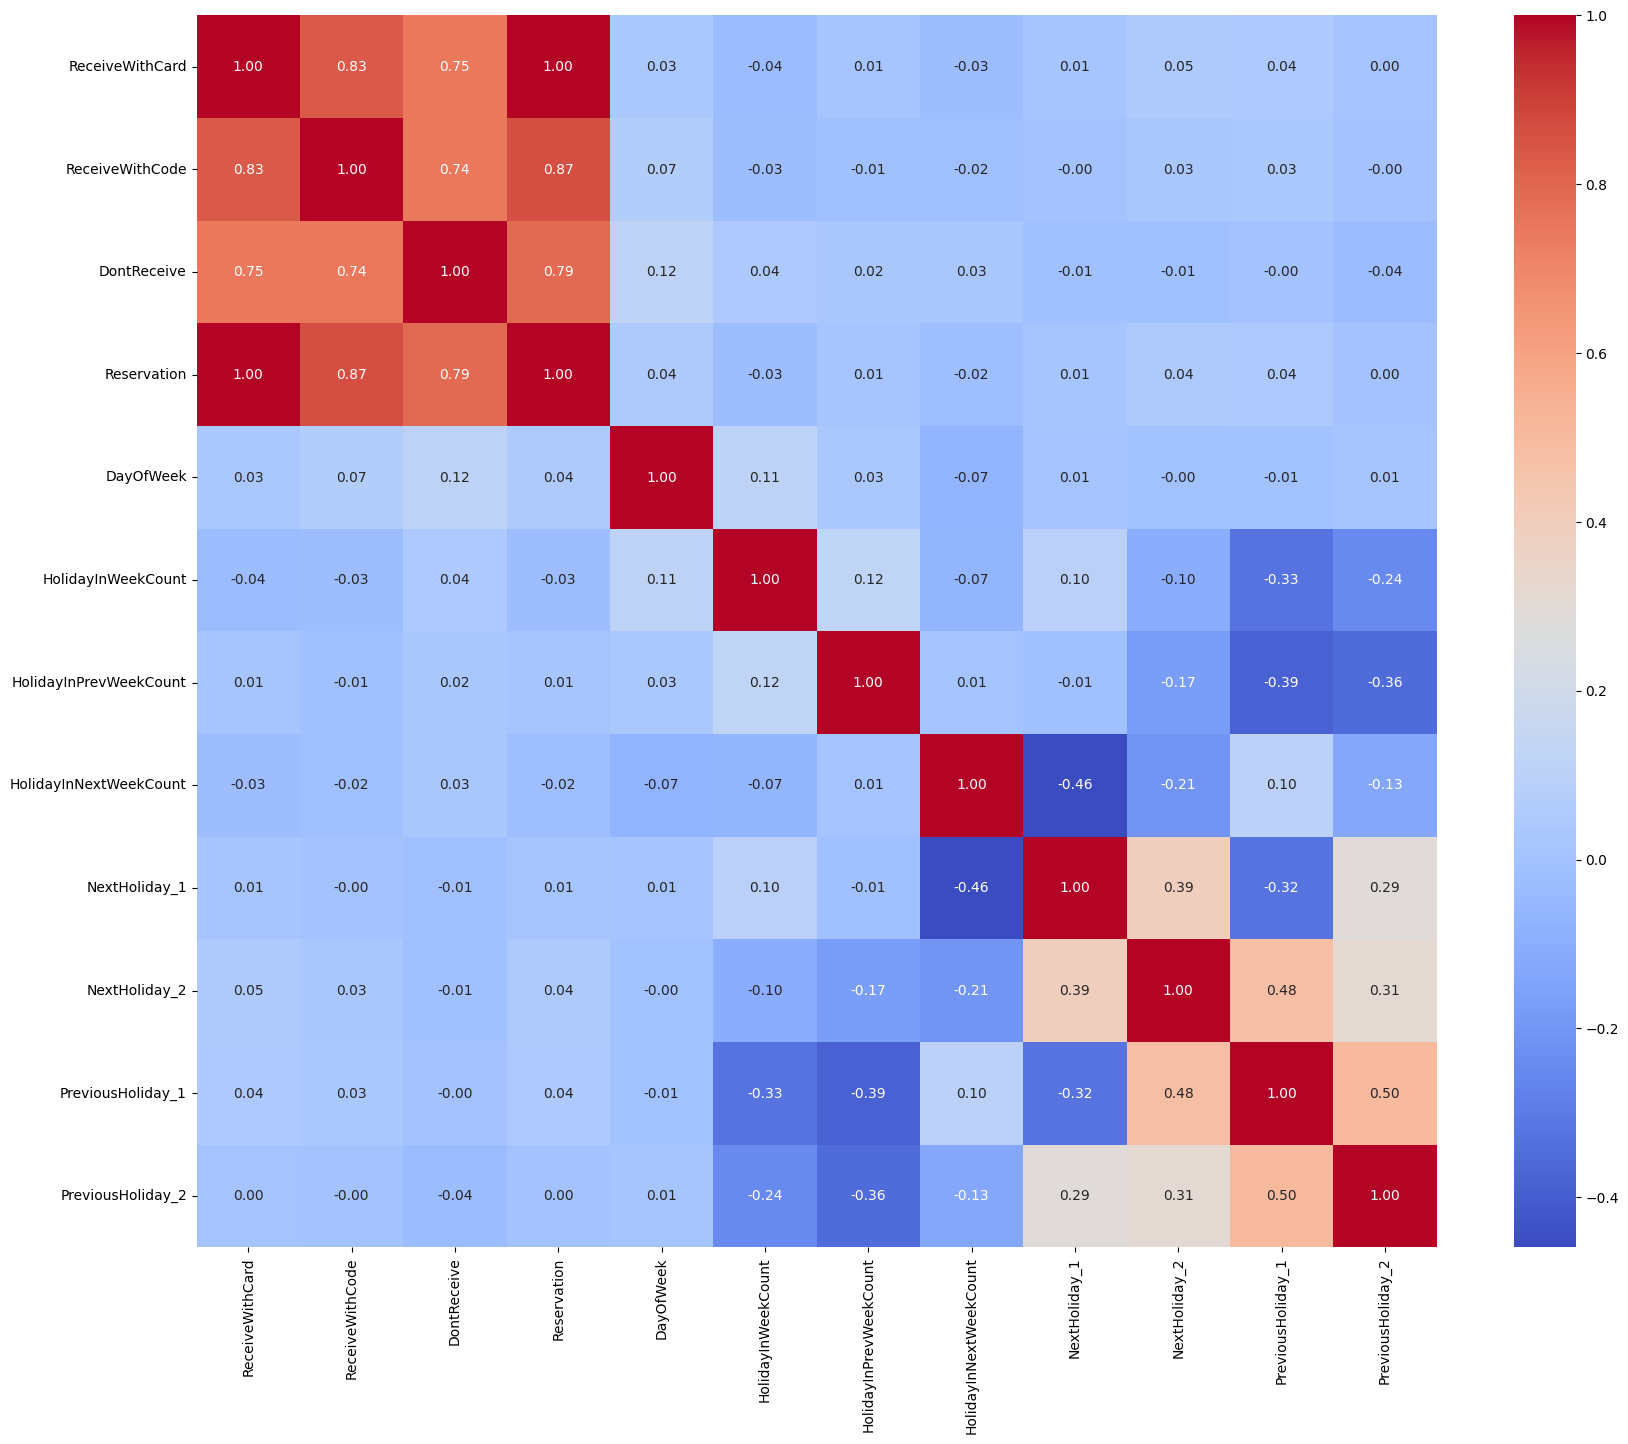

In [210]:
corr = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

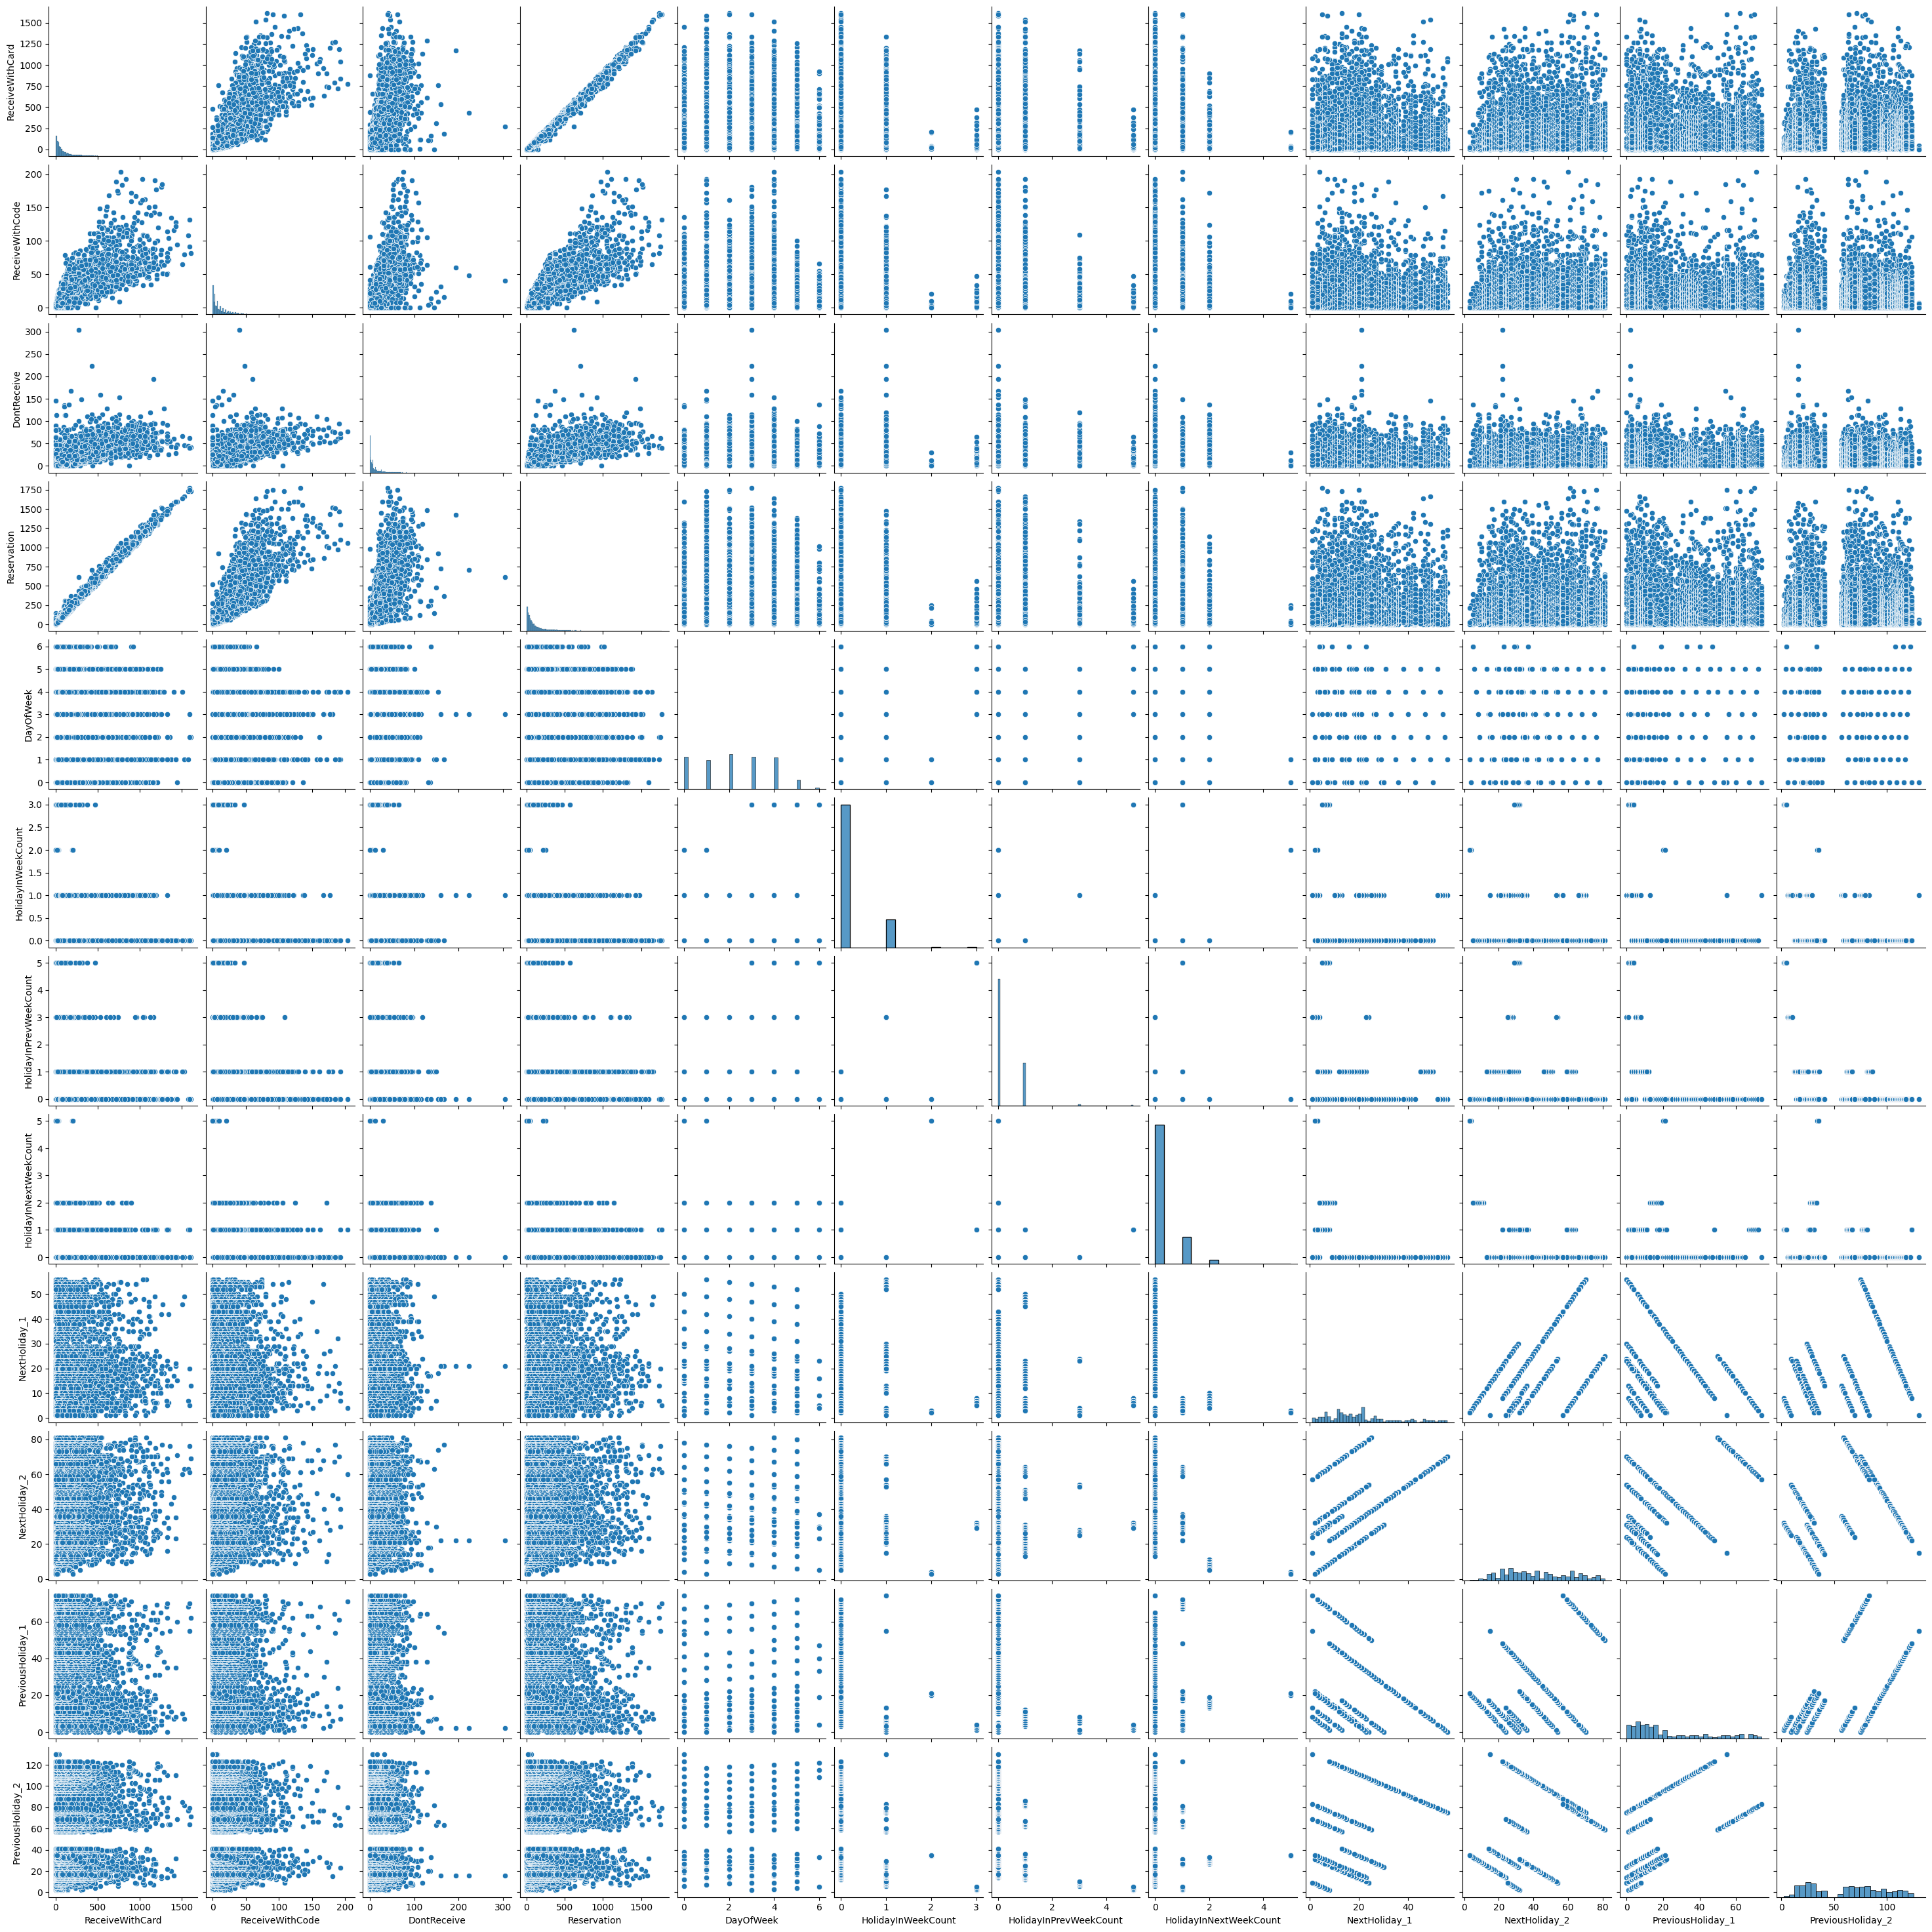

In [211]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df)

/tmp/ipykernel_912169/3564895994.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



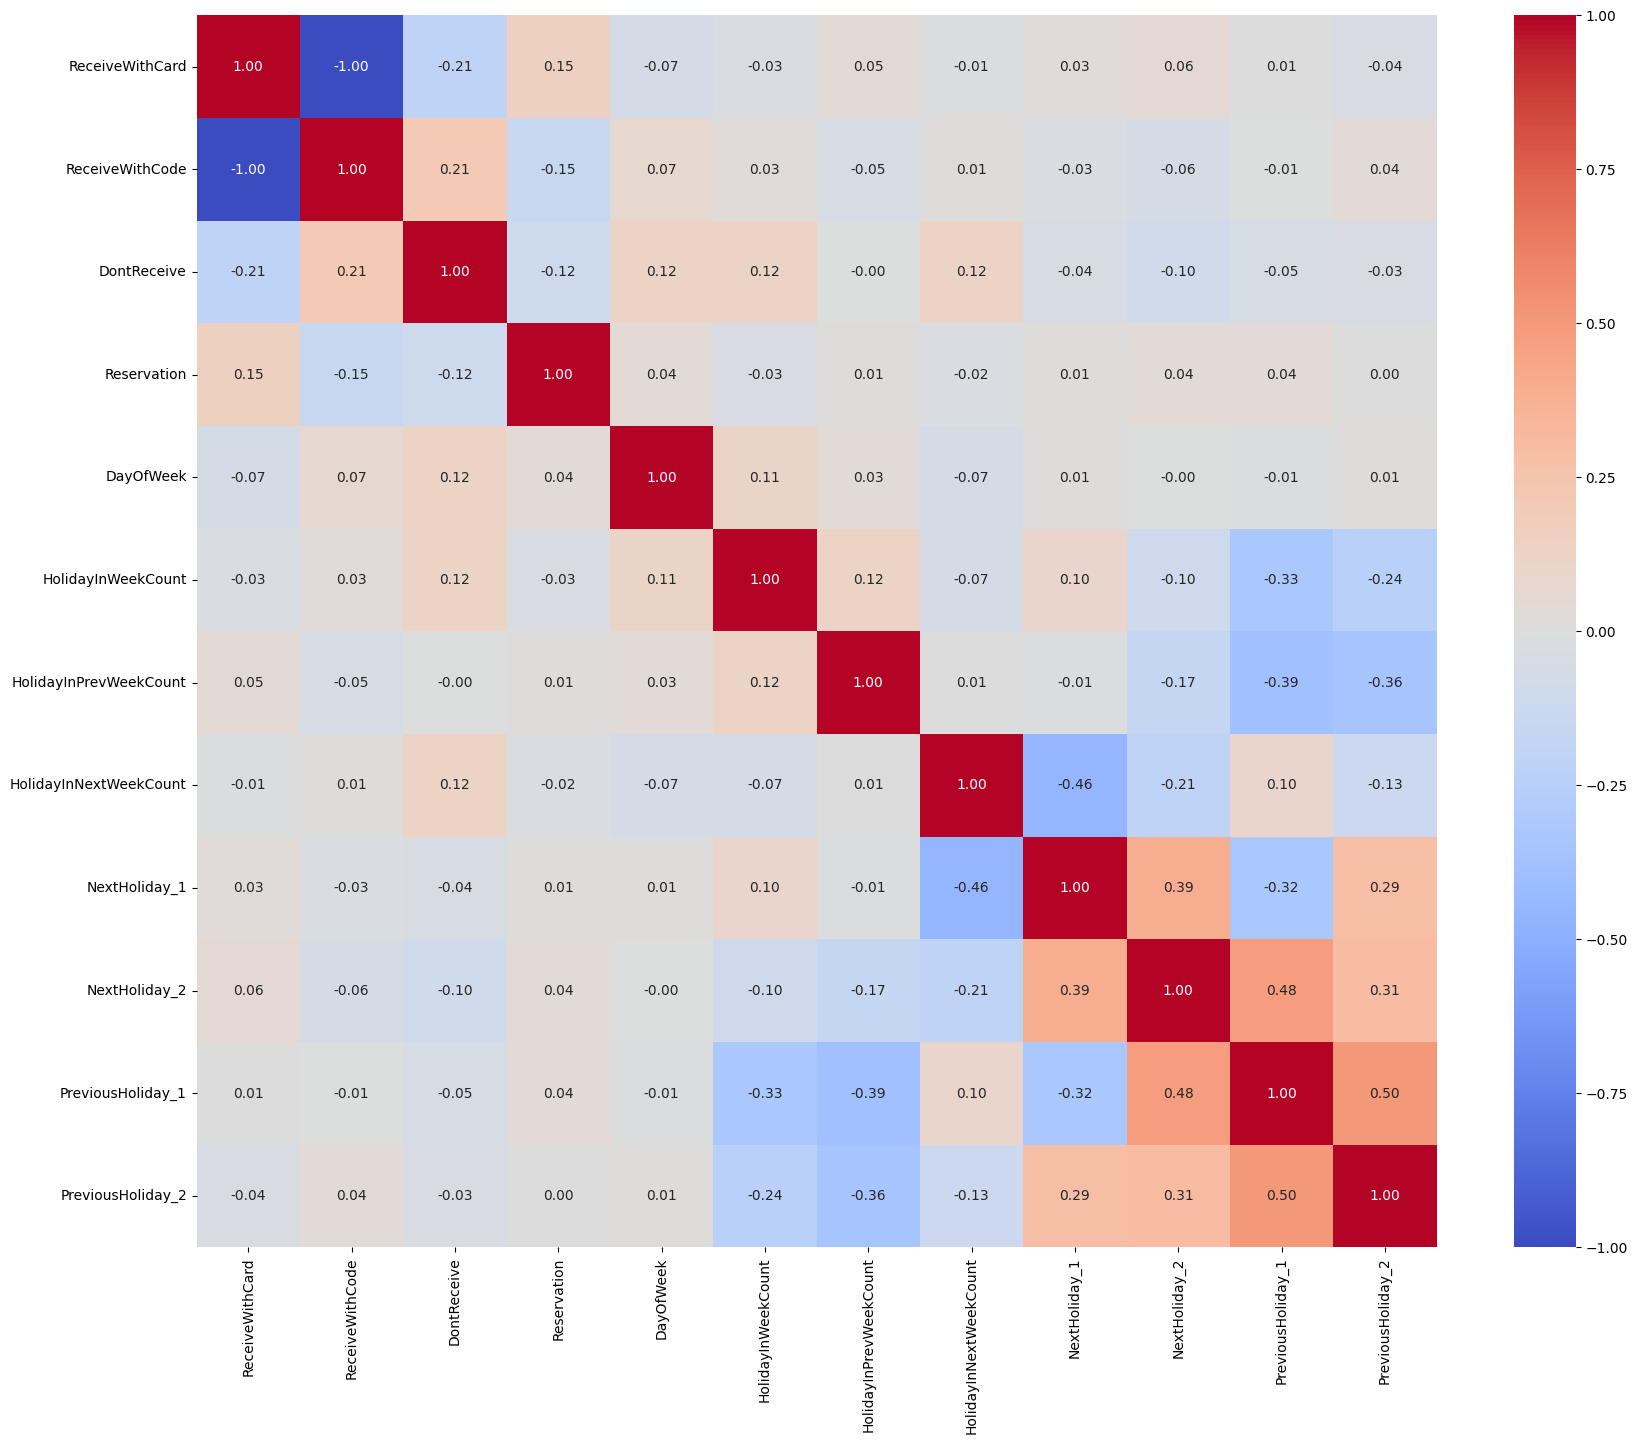

In [212]:
tmp = df['ReceiveWithCard'] + df['ReceiveWithCode']
for i in ['ReceiveWithCode', 'ReceiveWithCard']:
    df[i] /= tmp
df['DontReceive'] /= df['Reservation']
corr = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

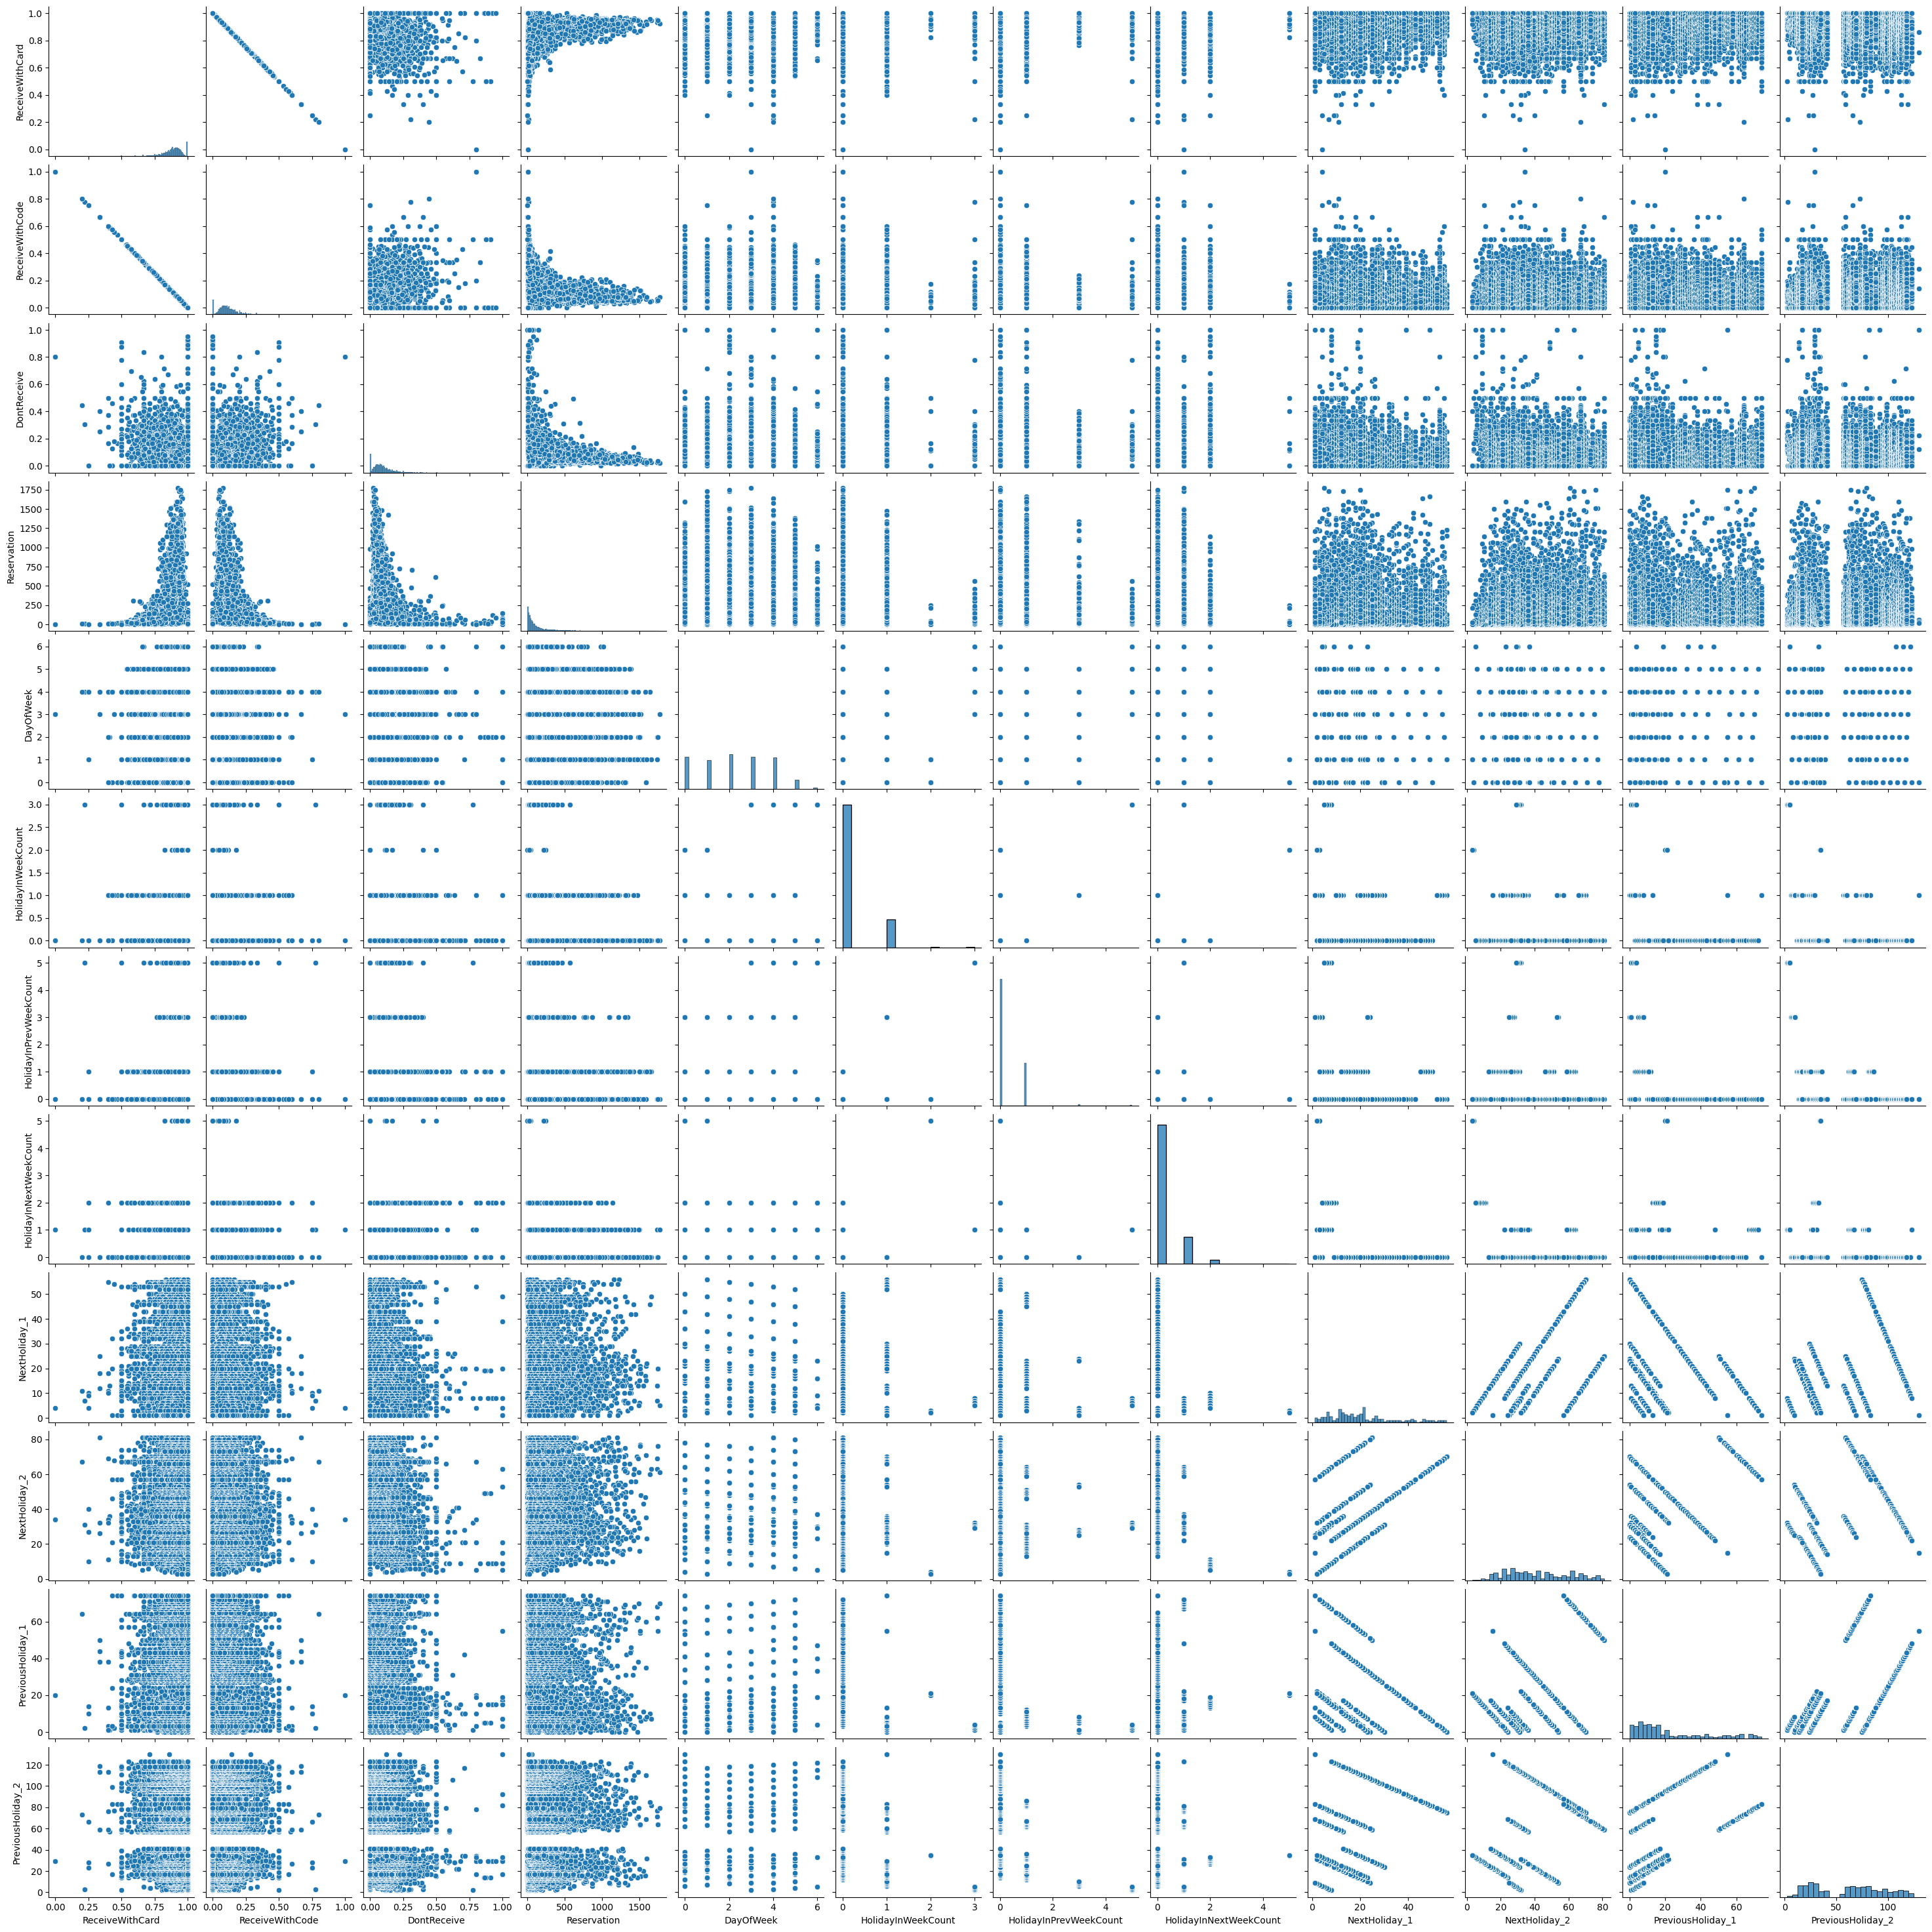

In [213]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13062 entries, 0 to 15967
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   DateReserve             13062 non-null  object  
 1   RestaurantName          13062 non-null  category
 2   RestaurantType          13062 non-null  object  
 3   Meal                    13062 non-null  category
 4   FoodName                13062 non-null  category
 5   FoodType                13062 non-null  category
 6   Gender                  13062 non-null  category
 7   ReceiveWithCard         13039 non-null  float64 
 8   ReceiveWithCode         13039 non-null  float64 
 9   DontReceive             13062 non-null  float64 
 10  Reservation             13062 non-null  int64   
 11  DayOfWeek               13062 non-null  int64   
 12  HolidayInWeekCount      13062 non-null  int64   
 13  HolidayInPrevWeekCount  13062 non-null  int64   
 14  HolidayInNextWeekCount

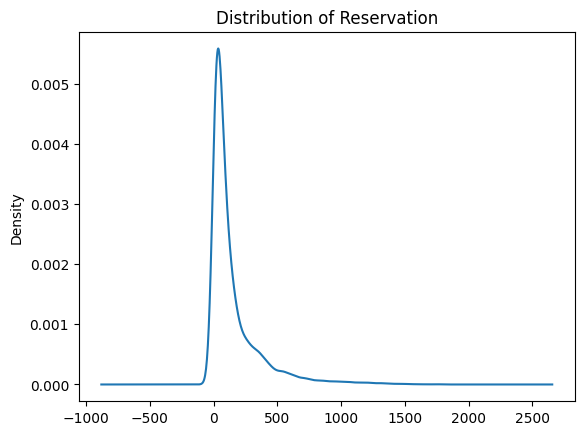

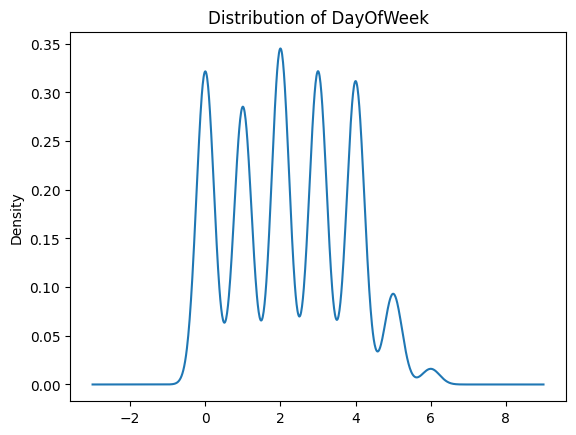

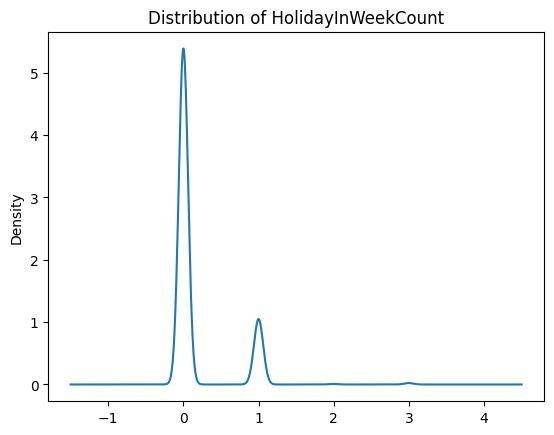

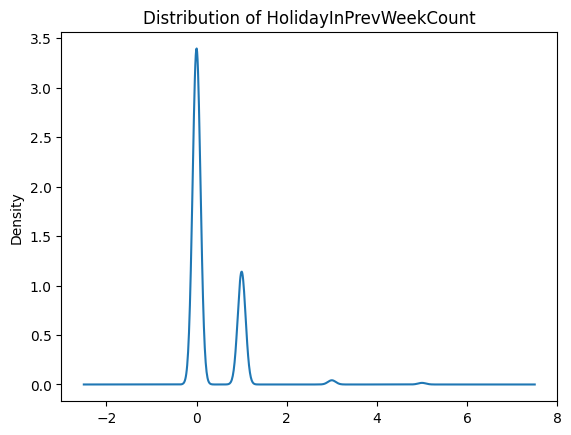

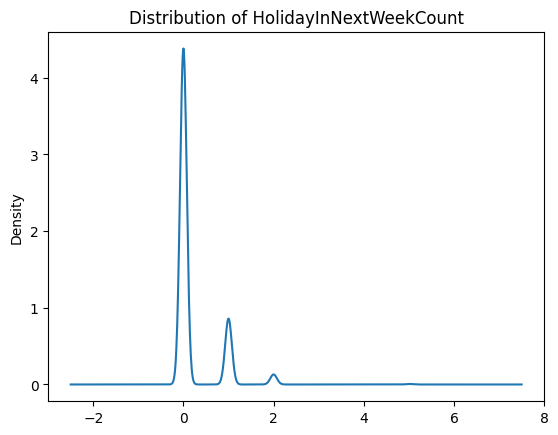

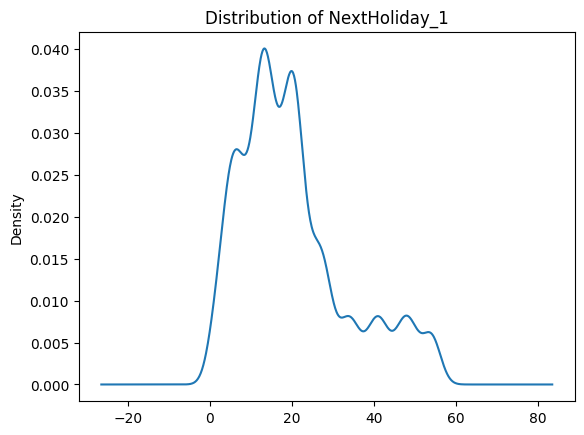

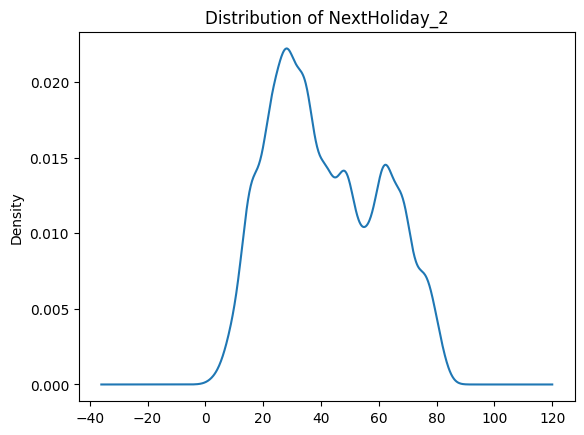

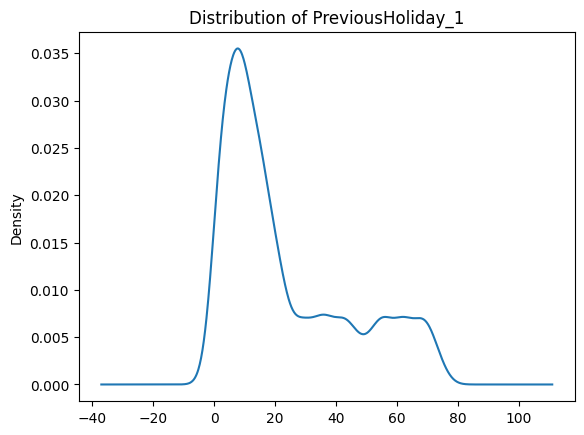

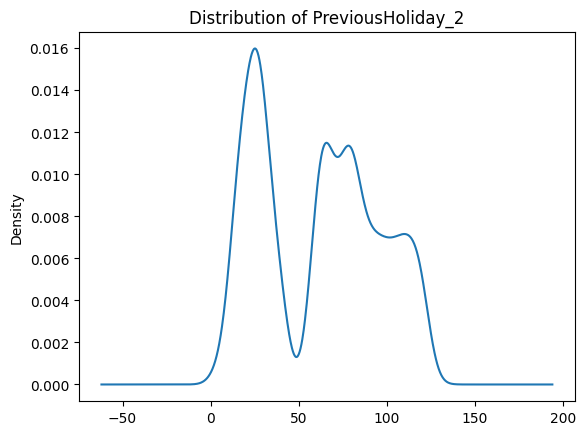

<Figure size 640x480 with 0 Axes>

In [215]:
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column].plot(kind='kde', title=f'Distribution of {column}')
        plt.show()

plt.tight_layout()
plt.show()

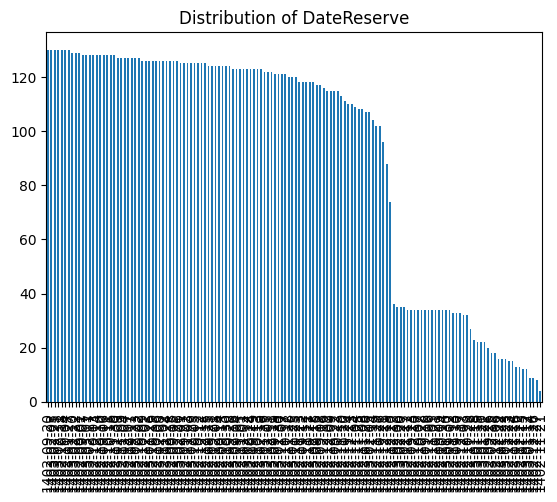

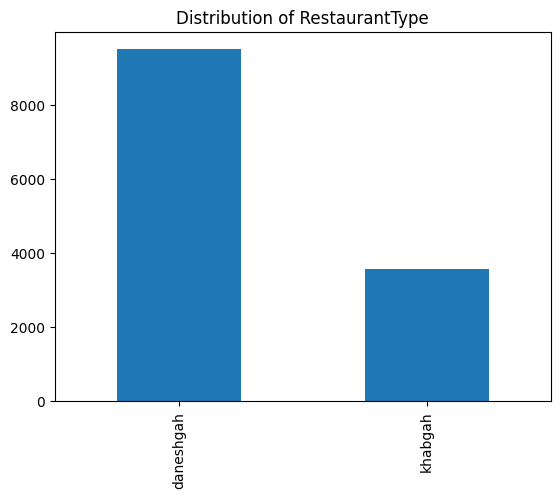

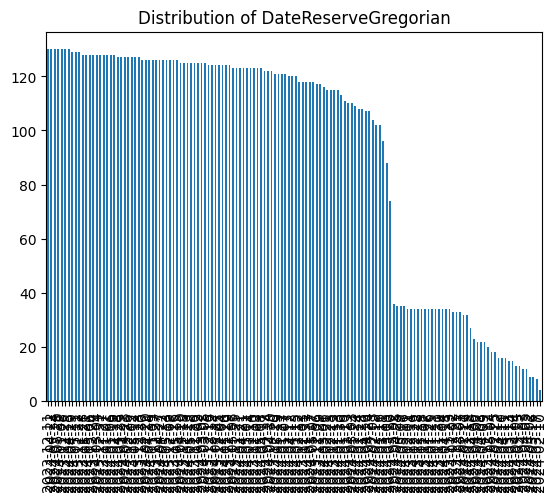

In [216]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', title=f'Distribution of {column}')
        plt.show()

In [250]:
len(df['DateReserve'].unique())

142

# Find tops:


> Top 10  cooked food per day

In [217]:
top_10 = df.groupby('DateReserve')['Reservation'].sum().nlargest(10)
top_10
# Month: Azar - Midterms duration

DateReserve
1402-09-05    24508
1402-09-14    24387
1402-09-12    24263
1402-09-06    24236
1402-09-13    24097
1402-10-11    23523
1402-09-20    23367
1402-10-05    23301
1402-10-04    23093
1402-09-21    23089
Name: Reservation, dtype: int64

In [218]:
my_date = '1402-09-05'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'],ascending=False)

values_on_date


DateReserve         RestaurantName RestaurantType    Meal  \
10681  1402-09-05           فنی امیرآباد      daneshgah   lunch   
10677  1402-09-05             فنی 16 آذر      daneshgah   lunch   
10649  1402-09-05                سطح شهر        khabgah  dinner   
10733  1402-09-05                    کوی        khabgah   lunch   
10731  1402-09-05                    کوی        khabgah  dinner   
...           ...                    ...            ...     ...   
10620  1402-09-05  الهیات و معارف اسلامی      daneshgah   lunch   
10624  1402-09-05     بیوشیمی و بیوفیزیک      daneshgah   lunch   
10697  1402-09-05           مطالعات جهان      daneshgah   lunch   
10631  1402-09-05         دامپزشکی تهران      daneshgah   lunch   
10710  1402-09-05               ژئوفیزیک      daneshgah   lunch   

                   FoodName FoodType Gender  ReceiveWithCard  ReceiveWithCode  \
10681          چلوجوجه كباب  berenji    man         0.872940         0.127060   
10677          چلوجوجه كباب  berenji    man         0.929057         0.070943   
10649   چلو خورش قورمه سبزی  berenji    man         0.937970         0.062030   
10733          چلوجوجه كباب  berenji    man         0.952577         0.047423   
10731   چلو خورش قورمه سبزی  berenji    man         0.952332         0.047668   
...                     ...      ...    ...              ...              ...   
10620  خوراک سالاد ماكاروني   khorak    man         1.000000         0.000000   
10624  خوراک سالاد ماكاروني   khorak  woman         1.000000         0.000000   
10697  خوراک سالاد ماكاروني   khorak  woman         0.800000         0.200000   
10631  خوراک سالاد ماكاروني   khorak    man         1.000000         0.000000   
10710  خوراک سالاد ماكاروني   khorak    man         0.800000         0.200000   

       DontReceive  Reservation  DayOfWeek  HolidayInWeekCount  \
10681     0.035762         1510          1                   0   
10677     0.079606         1118          1                   0   
10649     0.026532         1093          1                   0   
10733     0.062802         1035          1                   0   
10731     0.052063         1018          1                   0   
...            ...          ...        ...                 ...   
10620     0.166667            6          1                   0   
10624     0.000000            6          1                   0   
10697     0.000000            5          1                   0   
10631     0.000000            5          1                   0   
10710     0.000000            5          1                   0   

       HolidayInPrevWeekCount  HolidayInNextWeekCount  NextHoliday_1  \
10681                       0                       0             21   
10677                       0                       0             21   
10649                       0                       0             21   
10733                       0                       0             21   
10731                       0                       0             21   
...                       ...                     ...            ...   
10620                       0                       0             21   
10624                       0                       0             21   
10697                       0                       0             21   
10631                       0                       0             21   
10710                       0                       0             21   

       NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
10681             77                 54                 63   
10677             77                 54                 63   
10649             77                 54                 63   
10733             77                 54                 63   
10731             77                 54                 63   
...              ...                ...                ...   
10620             77                 54                 63   
10624             77                 54                 63   
10697       

In [219]:
my_date = '1402-09-14'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'],ascending=False)

values_on_date


DateReserve      RestaurantName RestaurantType    Meal  \
9009  1402-09-14             سطح شهر        khabgah  dinner   
9041  1402-09-14        فنی امیرآباد      daneshgah   lunch   
9094  1402-09-14                 کوی        khabgah  dinner   
9043  1402-09-14        فنی امیرآباد      daneshgah   lunch   
9037  1402-09-14          فنی 16 آذر      daneshgah   lunch   
...          ...                 ...            ...     ...   
9082  1402-09-14              کاسپین      daneshgah   lunch   
8992  1402-09-14  بیوشیمی و بیوفیزیک      daneshgah   lunch   
9081  1402-09-14              کاسپین      daneshgah   lunch   
9080  1402-09-14           کارآفرینی      daneshgah   lunch   
9062  1402-09-14        مطالعات جهان      daneshgah   lunch   

                          FoodName FoodType Gender  ReceiveWithCard  \
9009             خوراک سالاد الویه   khorak    man         0.927743   
9041              باقلاپلو با گوشت  berenji    man         0.827918   
9094  چلو خورش مسما بادمجان با مرغ  berenji    man         0.954545   
9043                خوراک ناگت مرغ   khorak    man         0.778274   
9037              باقلاپلو با گوشت  berenji    man         0.905565   
...                            ...      ...    ...              ...   
9082                خوراک ناگت مرغ   khorak  woman         0.846154   
8992                خوراک ناگت مرغ   khorak  woman         0.900000   
9081                خوراک ناگت مرغ   khorak    man         0.909091   
9080                خوراک ناگت مرغ   khorak  woman         1.000000   
9062                خوراک ناگت مرغ   khorak  woman         0.900000   

      ReceiveWithCode  DontReceive  Reservation  DayOfWeek  \
9009         0.072257     0.032787         1159          3   
9041         0.172082     0.078714          902          3   
9094         0.045455     0.059382          842          3   
9043         0.221726     0.071823          724          3   
9037         0.094435     0.113602          669          3   
...               ...          ...          ...        ...   
9082         0.153846     0.000000           13          3   
8992         0.100000     0.230769           13          3   
9081         0.090909     0.000000           11          3   
9080         0.000000     0.272727           11          3   
9062         0.100000     0.090909           11          3   

      HolidayInWeekCount  HolidayInPrevWeekCount  HolidayInNextWeekCount  \
9009                   0                       0                       0   
9041                   0                       0                       0   
9094                   0                       0                       0   
9043                   0                       0                       0   
9037                   0                       0                       0   
...                  ...                     ...                     ...   
9082                   0                       0                       0   
8992                   0                       0                       0   
9081                   0                       0                       0   
9080                   0                       0                       0   
9062                   0                       0                       0   

      NextHoliday_1  NextHoliday_2  PreviousHoliday_1  PreviousHoliday_2  \
9009             12             68                 63                 72   
9041             12             68                 63                 72   
9094             12             68                 63                 72   
9043             12             68                 63                 72   
9037             12             68                 63                 72   
...             ...            ...                ...                ...   
9082             12             68                 63                 72   
8992             12             68                 63                 72   
9081             12             68                 63

> Top 10 used codes per day

In [220]:
top_10 = (df.groupby('DateReserve')['ReceiveWithCode'].sum()/df.groupby('DateReserve')['Reservation'].sum()).nlargest(10)
top_10
# Month: Azar - Midterms duration

DateReserve
1402-11-21    0.003201
1402-11-25    0.002191
1402-11-14    0.001764
1402-11-23    0.001731
1402-11-24    0.001729
1403-01-15    0.001643
1402-09-25    0.001584
1402-12-21    0.001539
1402-12-19    0.001514
1402-12-26    0.001356
dtype: float64

> last 10 cooked food per day

In [221]:
top_10 = df.groupby('DateReserve')['Reservation'].sum().nsmallest(10)
top_10
# Month: Close to the holidays - Midterms duration
# These data are between two holidays

DateReserve
1402-11-21     133
1402-12-27     321
1402-12-26     417
1403-01-14     867
1403-01-15    1064
1402-12-25    1318
1403-01-16    1540
1402-12-24    1557
1403-01-17    2067
1402-12-23    2209
Name: Reservation, dtype: int64

1403-01-24 is a outlier and a wrong data

In [222]:
my_date = '1402-12-27'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'])

values_on_date


DateReserve RestaurantName RestaurantType    Meal         FoodName  \
15425  1402-12-27          چمران        khabgah  dinner    زرشك پلوبامرغ   
15423  1402-12-27         فاطمیه        khabgah  dinner  خوراک کوکو سبزی   
15420  1402-12-27        سطح شهر        khabgah  dinner  خوراک کوکو سبزی   
15422  1402-12-27        سطح شهر        khabgah  dinner    زرشك پلوبامرغ   
15424  1402-12-27         فاطمیه        khabgah  dinner    زرشك پلوبامرغ   
15421  1402-12-27        سطح شهر        khabgah  dinner    زرشك پلوبامرغ   
15426  1402-12-27            کوی        khabgah  dinner  خوراک کوکو سبزی   
15427  1402-12-27            کوی        khabgah  dinner    زرشك پلوبامرغ   

      FoodType Gender  ReceiveWithCard  ReceiveWithCode  DontReceive  \
15425  berenji  woman         1.000000         0.000000          0.0   
15423   khorak  woman         1.000000         0.000000          0.0   
15420   khorak    man         1.000000         0.000000          0.0   
15422  berenji  woman         1.000000         0.000000          0.0   
15424  berenji  woman         0.920000         0.080000          0.0   
15421  berenji    man         0.962963         0.037037          0.0   
15426   khorak    man         1.000000         0.000000          0.4   
15427  berenji    man         0.953488         0.046512          0.0   

       Reservation  DayOfWeek  HolidayInWeekCount  HolidayInPrevWeekCount  \
15425            4          1                   2                       0   
15423            5          1                   2                       0   
15420            7          1                   2                       0   
15422            8          1                   2                       0   
15424           25          1                   2                       0   
15421           27          1                   2                       0   
15426           30          1                   2                       0   
15427          215          1                   2                       0   

       HolidayInNextWeekCount  NextHoliday_1  NextHoliday_2  \
15425                       5              2              3   
15423                       5              2              3   
15420                       5              2              3   
15422                       5              2              3   
15424                       5              2              3   
15421                       5              2              3   
15426                       5              2              3   
15427                       5              2              3   

       PreviousHoliday_1  PreviousHoliday_2 DateReserveGregorian  
15425                 21                 35           2024-03-17  
15423                 21                 35           2024-03-17  
15420                 21                 35           2024-03-17  
15422                 21                 35           2024-03-17  
15424                 21                 35           2024-03-17  
15421                 21                 35           2024-03-17  
15426                 21                 35           2024-03-17  
15427                 21                 35           2024-03-17

> last 10 used codes per day

In [223]:
top_10 = df.groupby('DateReserve')['ReceiveWithCode'].sum().nsmallest(10)
top_10
# Month: Close to the holidays - Midterms duration

DateReserve
1402-12-27    0.163549
1402-11-21    0.425714
1402-12-26    0.565461
1403-01-14    1.142247
1403-01-23    1.188496
1403-02-15    1.221740
1403-01-16    1.330452
1402-12-06    1.333112
1403-01-22    1.337648
1402-09-26    1.410105
Name: ReceiveWithCode, dtype: float64

In [224]:
my_date = '1402-12-27'
values_on_date = df[df['DateReserve'] == my_date].sort_values(by=['Reservation'])

values_on_date


DateReserve RestaurantName RestaurantType    Meal         FoodName  \
15425  1402-12-27          چمران        khabgah  dinner    زرشك پلوبامرغ   
15423  1402-12-27         فاطمیه        khabgah  dinner  خوراک کوکو سبزی   
15420  1402-12-27        سطح شهر        khabgah  dinner  خوراک کوکو سبزی   
15422  1402-12-27        سطح شهر        khabgah  dinner    زرشك پلوبامرغ   
15424  1402-12-27         فاطمیه        khabgah  dinner    زرشك پلوبامرغ   
15421  1402-12-27        سطح شهر        khabgah  dinner    زرشك پلوبامرغ   
15426  1402-12-27            کوی        khabgah  dinner  خوراک کوکو سبزی   
15427  1402-12-27            کوی        khabgah  dinner    زرشك پلوبامرغ   

      FoodType Gender  ReceiveWithCard  ReceiveWithCode  DontReceive  \
15425  berenji  woman         1.000000         0.000000          0.0   
15423   khorak  woman         1.000000         0.000000          0.0   
15420   khorak    man         1.000000         0.000000          0.0   
15422  berenji  woman         1.000000         0.000000          0.0   
15424  berenji  woman         0.920000         0.080000          0.0   
15421  berenji    man         0.962963         0.037037          0.0   
15426   khorak    man         1.000000         0.000000          0.4   
15427  berenji    man         0.953488         0.046512          0.0   

       Reservation  DayOfWeek  HolidayInWeekCount  HolidayInPrevWeekCount  \
15425            4          1                   2                       0   
15423            5          1                   2                       0   
15420            7          1                   2                       0   
15422            8          1                   2                       0   
15424           25          1                   2                       0   
15421           27          1                   2                       0   
15426           30          1                   2                       0   
15427          215          1                   2                       0   

       HolidayInNextWeekCount  NextHoliday_1  NextHoliday_2  \
15425                       5              2              3   
15423                       5              2              3   
15420                       5              2              3   
15422                       5              2              3   
15424                       5              2              3   
15421                       5              2              3   
15426                       5              2              3   
15427                       5              2              3   

       PreviousHoliday_1  PreviousHoliday_2 DateReserveGregorian  
15425                 21                 35           2024-03-17  
15423                 21                 35           2024-03-17  
15420                 21                 35           2024-03-17  
15422                 21                 35           2024-03-17  
15424                 21                 35           2024-03-17  
15421                 21                 35           2024-03-17  
15426                 21                 35           2024-03-17  
15427                 21                 35           2024-03-17

> top 10 Not Recieved foods:

In [225]:
top_10 = df.groupby('DateReserve')['DontReceive'].sum().nlargest(100)
top_10
# Month: Close to the holidays - unexpected event like Martyrdom of the president of IRI(Ayatollah Raisi)

DateReserve
1402-12-21    33.584891
1402-12-09    19.745273
1402-09-25    19.505100
1402-09-29    19.339350
1402-11-25    19.334197
                ...    
1402-09-04     7.175197
1402-09-11     7.120592
1402-11-29     6.954230
1402-09-12     6.703324
1402-12-25     5.540059
Name: DontReceive, Length: 100, dtype: float64

In [226]:
top_10 = (df.groupby('DateReserve')['DontReceive'].sum()/df.groupby('DateReserve')['Reservation'].sum()).nlargest(10)
top_10

DateReserve
1402-11-21    0.017632
1402-12-25    0.004203
1402-12-21    0.003655
1403-01-14    0.002646
1402-12-24    0.002516
1402-12-26    0.002427
1402-11-25    0.002255
1403-01-15    0.002254
1402-12-23    0.001758
1402-11-23    0.001709
dtype: float64

> Most wanted Food:

In [227]:
df['TotalReceivedFood'] = df['ReceiveWithCode'] + df['ReceiveWithCard']

top_10 = df.groupby('FoodName')['TotalReceivedFood'].sum().nlargest(10)
top_10


FoodName
چلوجوجه كباب               657.0
چلو خورش قیمه سیب زمینی    631.0
عدس پلو با گوشت و كشمش     615.0
چلوكباب كوبیده             607.0
چلو خورش قورمه سبزی        571.0
خوراک آبگوشت               471.0
زرشك پلوبامرغ              460.0
چلوكباب كوبیده نگيني       458.0
خوراک ماكارونی با قارچ     433.0
خوراک کوردن بلو            412.0
Name: TotalReceivedFood, dtype: float64

> Most not wanted foods:


In [228]:
last_10 = df.groupby('FoodName')['TotalReceivedFood'].sum().nsmallest(10)
last_10

FoodName
 خوراک بادمجان               2.0
 خوراک كوفته تبریزی          2.0
 خوراک کوردن بلو             2.0
2 خوراک چیكن استروگانوف      2.0
خوراک كباب كوبیده            2.0
خوراک لوبیا چیتی با قارچ     2.0
خوراک مرغ سوخاری             2.0
خوراک ناگت میگو              2.0
خوراک کوکو سیب زمینی         2.0
زرشك پلوبا گوشت              2.0
Name: TotalReceivedFood, dtype: float64

In [229]:
FoodsCount = df.groupby('FoodName')['TotalReceivedFood'].sum().nlargest(60)
FoodsCount

FoodName
چلوجوجه كباب                    657.0
چلو خورش قیمه سیب زمینی         631.0
عدس پلو با گوشت و كشمش          615.0
چلوكباب كوبیده                  607.0
چلو خورش قورمه سبزی             571.0
خوراک آبگوشت                    471.0
زرشك پلوبامرغ                   460.0
چلوكباب كوبیده نگيني            458.0
خوراک ماكارونی با قارچ          433.0
خوراک کوردن بلو                 412.0
خوراک ناگت مرغ                  402.0
لوبیا پلو باگوشت                394.0
خوراک كوفته تبریزی              340.0
خوراک دلمه                      336.0
چلو خورش كرفس                   332.0
خوراک قارچ و گوشت               308.0
خوراک كشك بادمجان               307.0
سبزی پلو با تن ماهی             307.0
خوراک فلافل                     304.0
خوراک نخود فرنگی با مرغ         277.0
خوراک سالاد ماكاروني            275.0
خوراک كتلت                      270.0
خوراک شنیسل مرغ                 265.0
باقلاپلو با گوشت                216.0
خوراک کوکو سبزی                 207.0
چلو خورش فسنجان                 205.0
خور

In [230]:
df.columns

Index(['DateReserve', 'RestaurantName', 'RestaurantType', 'Meal', 'FoodName',
       'FoodType', 'Gender', 'ReceiveWithCard', 'ReceiveWithCode',
       'DontReceive', 'Reservation', 'DayOfWeek', 'HolidayInWeekCount',
       'HolidayInPrevWeekCount', 'HolidayInNextWeekCount', 'NextHoliday_1',
       'NextHoliday_2', 'PreviousHoliday_1', 'PreviousHoliday_2',
       'DateReserveGregorian', 'TotalReceivedFood'],
      dtype='object')

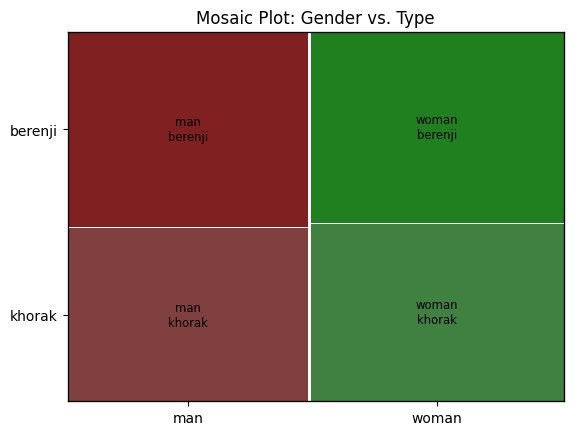

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.graphics.mosaicplot import mosaic
# Create your DataFrame (replace this with your actual data)




# Select only the categorical columns
categorical_columns = ['FoodType','Gender','DayOfWeek']
mosaic(df, ['Gender', 'FoodType'])
plt.title('Mosaic Plot: Gender vs. Type')
plt.show()

